<a href="https://colab.research.google.com/github/amnaahmad20/Smart-weather-monitoring-system/blob/main/Smart_weather_monitoring_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smart weather monitoring system



*   Lamees 347289
*   Amna Ahmad 335246
*   Fatima Hussain 350328
*   Ayesha Shamim Naime 356760
*   Muhammad Abdullah Khan Abbasi 339550







#Acquire Dataset -World Weather Repository ( Daily Updating from kaggle)

In [159]:
# kaggle api
!mkdir -p /root/.kaggle
!mv /content/kaggle.json /root/.kaggle/

mv: cannot stat '/content/kaggle.json': No such file or directory


In [160]:
# download data from kaggle
!kaggle datasets download -d nelgiriyewithana/global-weather-repository

global-weather-repository.zip: Skipping, found more recently modified local copy (use --force to force download)


In [161]:
!unzip /content/global-weather-repository.zip

Archive:  /content/global-weather-repository.zip
replace GlobalWeatherRepository.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: GlobalWeatherRepository.csv  


In [162]:
# imports
import pandas as pd
import numpy as np

In [163]:
# read csv
df = pd.read_csv("/content/GlobalWeatherRepository.csv")

In [164]:
# first view of data
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,Venezuela,Caracas,10.50,-66.92,America/Caracas,1703961000,2023-12-30 14:30,32.0,89.6,Partly cloudy,...,3.1,5.2,1,1,06:44 AM,06:16 PM,09:33 PM,09:39 AM,Waning Gibbous,91
23190,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1703960100,2023-12-31 01:15,21.0,69.8,Mist,...,272.2,316.8,6,10,06:33 AM,05:25 PM,08:22 PM,09:05 AM,Waning Gibbous,91
23191,Yemen,Sanaa,15.35,44.21,Asia/Aden,1703961000,2023-12-30 21:30,16.1,60.9,Patchy rain possible,...,11.4,27.6,1,1,06:28 AM,05:43 PM,08:46 PM,09:09 AM,Waning Gibbous,91
23192,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1703961000,2023-12-30 20:30,20.6,69.1,Clear,...,19.6,30.6,2,2,05:38 AM,06:40 PM,09:36 PM,08:25 AM,Waning Gibbous,91


#Data Insights

In [165]:
# get data columns, types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23194 entries, 0 to 23193
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       23194 non-null  object 
 1   location_name                 23194 non-null  object 
 2   latitude                      23194 non-null  float64
 3   longitude                     23194 non-null  float64
 4   timezone                      23194 non-null  object 
 5   last_updated_epoch            23194 non-null  int64  
 6   last_updated                  23194 non-null  object 
 7   temperature_celsius           23194 non-null  float64
 8   temperature_fahrenheit        23194 non-null  float64
 9   condition_text                23194 non-null  object 
 10  wind_mph                      23194 non-null  float64
 11  wind_kph                      23194 non-null  float64
 12  wind_degree                   23194 non-null  int64  
 13  w

In [166]:
# null values
df.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [167]:
# columns
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [168]:
# get islamabad rows
islamabad = df[df['location_name']=="Islamabad"]

In [169]:
# remove the columns that dont adhere to our project
columns_to_keep = ['last_updated','temperature_celsius', 'condition_text', 'wind_kph', 'precip_mm', 'gust_kph',
                   'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                   'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                   'air_quality_us-epa-index', 'air_quality_gb-defra-index']

In [170]:
islamabad = islamabad[columns_to_keep]
islamabad.shape

(119, 14)

In [171]:
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
131,2023-08-29 14:45,31.9,Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10
326,2023-08-30 07:45,25.7,Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5
521,2023-08-31 04:45,25.7,Clear,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6
716,2023-09-01 04:45,26.3,Clear,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10
911,2023-09-02 04:30,26.6,Clear,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,2023-12-27 00:00,11.9,Clear,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10
22545,2023-12-27 23:30,12.4,Clear,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10
22740,2023-12-28 23:30,11.4,Clear,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10
22935,2023-12-29 23:15,10.8,Overcast,7.2,0.0,15.1,6301.9,0.0,159.0,25.3,424.3,502.9,6,10


In [172]:
islamabad['last_updated'] = pd.to_datetime(islamabad['last_updated'], format='%Y-%m-%d').dt.date

#Formatting Data for ThingsSpeak

<p><strong>ThingSpeak</strong> is an Internet of Things (IoT) platform that enables users to collect, analyze, and visualize data from sensors or devices in real-time. It provides a cloud-based infrastructure for managing and sharing IoT data, making it accessible for monitoring and decision-making applications.</p>


In [173]:
islamabad_thingsspeak = islamabad

In [174]:
air_quality_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                    'air_quality_us-epa-index', 'air_quality_gb-defra-index']

# Calculate the row-wise average
islamabad_thingsspeak['average_air_quality'] = islamabad_thingsspeak[air_quality_cols].mean(axis=1, skipna=True)

# Display the DataFrame with the new column
islamabad_thingsspeak

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2023-08-29,31.9,Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,244.3000
326,2023-08-30,25.7,Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,108.4375
521,2023-08-31,25.7,Clear,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,132.6375
716,2023-09-01,26.3,Clear,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,136.2750
911,2023-09-02,26.6,Clear,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,146.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,2023-12-27,11.9,Clear,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,275.4125
22545,2023-12-27,12.4,Clear,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,311.3500
22740,2023-12-28,11.4,Clear,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,617.8250
22935,2023-12-29,10.8,Overcast,7.2,0.0,15.1,6301.9,0.0,159.0,25.3,424.3,502.9,6,10,928.6750


In [175]:
islamabad_thingsspeak = islamabad_thingsspeak.drop(['condition_text', 'gust_kph', 'air_quality_Carbon_Monoxide',
                                                    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
                                                    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
                                                    'air_quality_gb-defra-index'], axis=1)
islamabad_thingsspeak

,last_updated,temperature_celsius,wind_kph,precip_mm,average_air_quality
131,2023-08-29,31.9,5.8,0.0,244.3000
326,2023-08-30,25.7,7.6,0.0,108.4375
521,2023-08-31,25.7,10.1,0.0,132.6375
716,2023-09-01,26.3,4.3,0.0,136.2750
911,2023-09-02,26.6,8.6,0.0,146.0625
...,...,...,...,...,...
22350,2023-12-27,11.9,7.6,0.0,275.4125
22545,2023-12-27,12.4,8.3,0.0,311.3500
22740,2023-12-28,11.4,9.7,0.0,617.8250
22935,2023-12-29,10.8,7.2,0.0,928.6750


In [176]:
# export the datafarem to allow Visualziation on ThingsSpeak
islamabad_thingsspeak.to_csv('islamabad.csv', index=False)

#Descriptive Data Analysis

In [177]:
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2023-08-29,31.9,Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,244.3000
326,2023-08-30,25.7,Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,108.4375
521,2023-08-31,25.7,Clear,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,132.6375
716,2023-09-01,26.3,Clear,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,136.2750
911,2023-09-02,26.6,Clear,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,146.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,2023-12-27,11.9,Clear,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,275.4125
22545,2023-12-27,12.4,Clear,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,311.3500
22740,2023-12-28,11.4,Clear,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,617.8250
22935,2023-12-29,10.8,Overcast,7.2,0.0,15.1,6301.9,0.0,159.0,25.3,424.3,502.9,6,10,928.6750


In [178]:
# get the classes
islamabad.condition_text.value_counts()

Clear                             84
Partly cloudy                     14
Patchy rain possible               8
Cloudy                             4
Overcast                           3
Sunny                              2
Light rain shower                  2
Patchy light rain with thunder     2
Name: condition_text, dtype: int64

In [179]:
# merging the classes
weather_mapping = {
    'Clear': 'Clear & Sunny',
    'Sunny': 'Clear & Sunny',
    'Partly cloudy': 'Partly Cloudy & Patchy Clouds',
    'Patchy rain possible': 'Partly Cloudy & Patchy Clouds',
    'Light rain shower': 'Partly Cloudy & Patchy Clouds',
    'Patchy light rain with thunder': 'Partly Cloudy & Patchy Clouds',
    'Cloudy': 'Cloudy & Overcast',
    'Overcast': 'Cloudy & Overcast'
}

# Create a new column 'combined_weather'
islamabad['condition_text'] = islamabad['condition_text'].map(weather_mapping)

# Display the updated DataFrame
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2023-08-29,31.9,Clear & Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,244.3000
326,2023-08-30,25.7,Clear & Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,108.4375
521,2023-08-31,25.7,Clear & Sunny,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,132.6375
716,2023-09-01,26.3,Clear & Sunny,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,136.2750
911,2023-09-02,26.6,Clear & Sunny,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,146.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,2023-12-27,11.9,Clear & Sunny,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,275.4125
22545,2023-12-27,12.4,Clear & Sunny,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,311.3500
22740,2023-12-28,11.4,Clear & Sunny,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,617.8250
22935,2023-12-29,10.8,Cloudy & Overcast,7.2,0.0,15.1,6301.9,0.0,159.0,25.3,424.3,502.9,6,10,928.6750


In [180]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
# Set seaborn style for better visualization
sns.set(style="whitegrid")

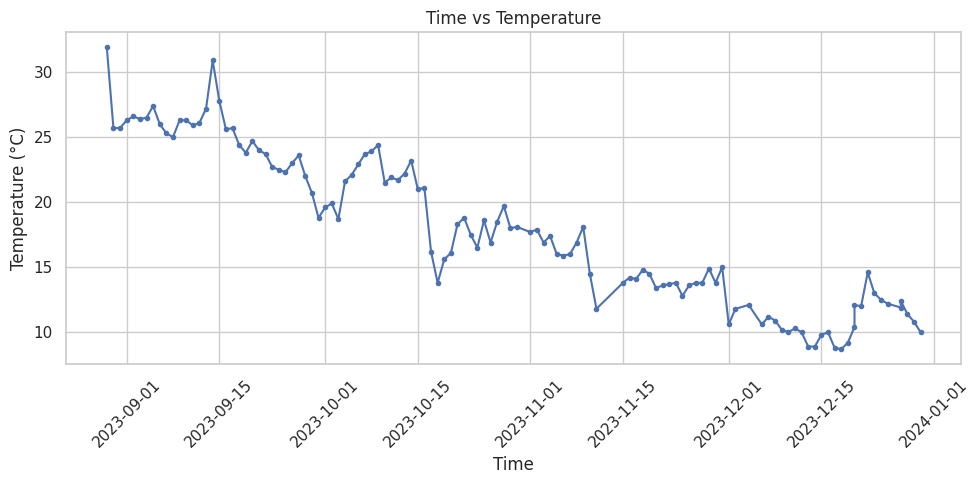

In [182]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(islamabad['last_updated'], islamabad['temperature_celsius'], marker='.', linestyle='-', color='b')
plt.title('Time vs Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

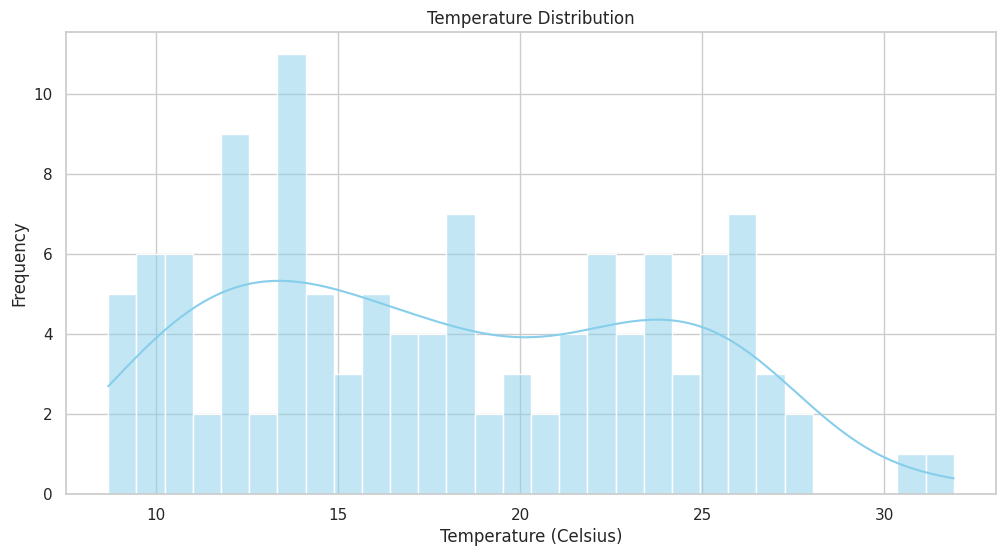

In [183]:
# Temperature Distribution
plt.figure(figsize=(12, 6))
sns.histplot(islamabad['temperature_celsius'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

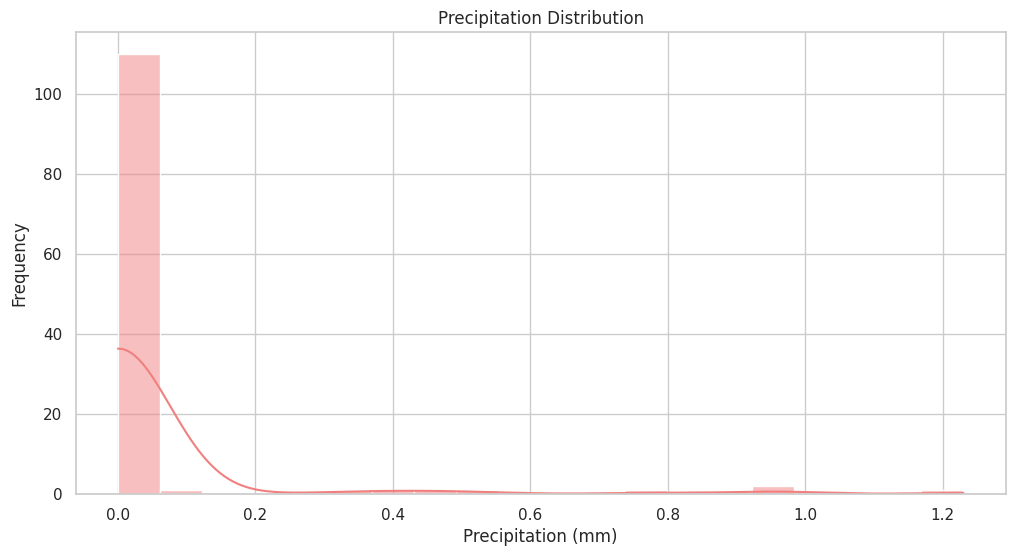

In [184]:
# Precipitation Distribution
plt.figure(figsize=(12, 6))
sns.histplot(islamabad['precip_mm'], bins=20, kde=True, color='lightcoral')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

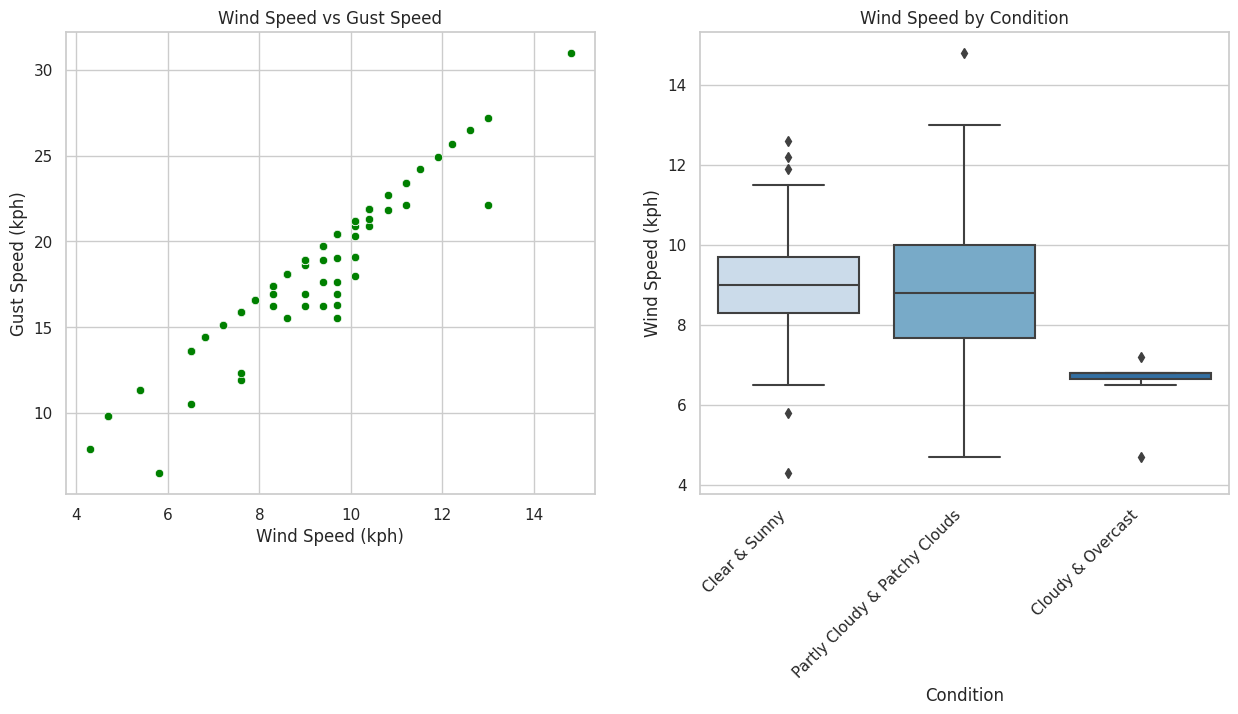

In [185]:
# Wind and Gust Visualization
plt.figure(figsize=(15, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='wind_kph', y='gust_kph', data=islamabad, color='green')
plt.title('Wind Speed vs Gust Speed')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Gust Speed (kph)')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='condition_text', y='wind_kph', data=islamabad, palette='Blues')
plt.title('Wind Speed by Condition')
plt.xlabel('Condition')
plt.ylabel('Wind Speed (kph)')

# Set x-label rotation angle
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.show()


In [186]:
# Air Quality Visualization
plt.figure(figsize=(15, 8))
for i, col in enumerate(air_quality_cols):
    plt.subplot(2, 3, i)
    sns.histplot(islamabad[col], bins=20, kde=True, color='orange')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 1500x800 with 0 Axes>

#Preprocessing for the model

In [187]:
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2023-08-29,31.9,Clear & Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,244.3000
326,2023-08-30,25.7,Clear & Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,108.4375
521,2023-08-31,25.7,Clear & Sunny,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,132.6375
716,2023-09-01,26.3,Clear & Sunny,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,136.2750
911,2023-09-02,26.6,Clear & Sunny,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,146.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,2023-12-27,11.9,Clear & Sunny,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,275.4125
22545,2023-12-27,12.4,Clear & Sunny,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,311.3500
22740,2023-12-28,11.4,Clear & Sunny,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,617.8250
22935,2023-12-29,10.8,Cloudy & Overcast,7.2,0.0,15.1,6301.9,0.0,159.0,25.3,424.3,502.9,6,10,928.6750


In [188]:
islamabad_model = islamabad.drop(["last_updated"],axis=1)

In [189]:
# averaging air quality
islamabad_model['average_air_quality'] = islamabad_model[air_quality_cols].mean(axis=1, skipna=True)

# Display the DataFrame with the new column
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,31.9,Clear & Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,244.3000
326,25.7,Clear & Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,108.4375
521,25.7,Clear & Sunny,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,132.6375
716,26.3,Clear & Sunny,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,136.2750
911,26.6,Clear & Sunny,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,146.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22350,11.9,Clear & Sunny,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,275.4125
22545,12.4,Clear & Sunny,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,311.3500
22740,11.4,Clear & Sunny,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,617.8250
22935,10.8,Cloudy & Overcast,7.2,0.0,15.1,6301.9,0.0,159.0,25.3,424.3,502.9,6,10,928.6750


In [190]:
islamabad_model = islamabad_model.drop(air_quality_cols, axis=1)

In [191]:
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,average_air_quality
131,31.9,Clear & Sunny,5.8,0.0,6.5,244.3000
326,25.7,Clear & Sunny,7.6,0.0,11.9,108.4375
521,25.7,Clear & Sunny,10.1,0.0,20.9,132.6375
716,26.3,Clear & Sunny,4.3,0.0,7.9,136.2750
911,26.6,Clear & Sunny,8.6,0.0,15.5,146.0625
...,...,...,...,...,...,...
22350,11.9,Clear & Sunny,7.6,0.0,15.9,275.4125
22545,12.4,Clear & Sunny,8.3,0.0,17.4,311.3500
22740,11.4,Clear & Sunny,9.7,0.0,20.4,617.8250
22935,10.8,Cloudy & Overcast,7.2,0.0,15.1,928.6750


In [192]:
islamabad_model = islamabad_model.drop(['gust_kph'], axis=1)

In [193]:
islamabad_model.describe()

,temperature_celsius,wind_kph,precip_mm,average_air_quality
count,119.000000,119.000000,119.000000,119.000000
mean,17.989916,8.794958,0.048571,241.363130
std,5.882168,1.763368,0.193230,127.218714
min,8.700000,4.300000,0.000000,66.825000
25%,13.200000,7.750000,0.000000,159.687500
50%,17.500000,9.000000,0.000000,215.812500
75%,23.100000,9.700000,0.000000,286.150000
max,31.900000,14.800000,1.230000,928.675000


In [194]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df and you want to normalize specific columns
columns_to_normalize = ['temperature_celsius', 'wind_kph', 'average_air_quality']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
islamabad_model[columns_to_normalize] = scaler.fit_transform(islamabad_model[columns_to_normalize])

# Display the updated DataFrame
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,average_air_quality
131,2.374788,Clear & Sunny,-1.705612,0.0,0.023183
326,1.316298,Clear & Sunny,-0.680522,0.0,-1.049277
521,1.316298,Clear & Sunny,0.743214,0.0,-0.858249
716,1.418732,Clear & Sunny,-2.559854,0.0,-0.829536
911,1.469950,Clear & Sunny,-0.111028,0.0,-0.752276
...,...,...,...,...,...
22350,-1.039696,Clear & Sunny,-0.680522,0.0,0.268776
22545,-0.954334,Clear & Sunny,-0.281876,0.0,0.552456
22740,-1.125058,Clear & Sunny,0.515417,0.0,2.971683
22935,-1.227493,Cloudy & Overcast,-0.908320,0.0,5.425444


In [195]:
islamabad_model.condition_text.value_counts()

Clear & Sunny                    86
Partly Cloudy & Patchy Clouds    26
Cloudy & Overcast                 7
Name: condition_text, dtype: int64

In [196]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categories = ['Clear & Sunny', 'Partly Cloudy & Patchy Clouds', 'Cloudy & Overcast']

label_encoder.fit(categories)

# Transform the 'condition_text' column
islamabad_model['condition_text'] = label_encoder.transform(islamabad_model['condition_text'])

In [197]:
# Display the mapping between encoded values and original class labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

Class Mapping:
{'Clear & Sunny': 0, 'Cloudy & Overcast': 1, 'Partly Cloudy & Patchy Clouds': 2}


In [198]:
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,average_air_quality
131,2.374788,0,-1.705612,0.0,0.023183
326,1.316298,0,-0.680522,0.0,-1.049277
521,1.316298,0,0.743214,0.0,-0.858249
716,1.418732,0,-2.559854,0.0,-0.829536
911,1.469950,0,-0.111028,0.0,-0.752276
...,...,...,...,...,...
22350,-1.039696,0,-0.680522,0.0,0.268776
22545,-0.954334,0,-0.281876,0.0,0.552456
22740,-1.125058,0,0.515417,0.0,2.971683
22935,-1.227493,1,-0.908320,0.0,5.425444


In [199]:
islamabad_model.condition_text.value_counts()

0    86
2    26
1     7
Name: condition_text, dtype: int64

#Predictive Analysis

In [209]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [228]:
# Split the data into features (X) and target (y)
X = islamabad_model.drop(columns=['condition_text'])
y = islamabad_model['condition_text']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

<dl>
  <dt>'Clear & Sunny; 0'</dt>
  
  <dt>'Cloudy & Overcast: 1'</dt>
  
  <dt>'Partly Cloudy & Patchy Clouds: 2'</dt>
</dl>


In [229]:
dst = DecisionTreeClassifier()

dst.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dst.predict(X_test)

# Display the classification report
print(f"Classification Report for Decision Tree Classifier")
print(classification_report(y_test, y_pred))
print("-" * 50)

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.50      0.67         2
           2       0.80      0.80      0.80         5

    accuracy                           0.92        24
   macro avg       0.91      0.77      0.81        24
weighted avg       0.92      0.92      0.91        24

--------------------------------------------------


<p>Considering the classification results, the Decision Tree model exhibits suboptimal recall values, particularly for the 'Partly Cloudy & Patchy Clouds' class. This indicates a need for further improvement in the model's performance on this specific class.</p>


In [230]:
class_weights = {0: 1,
                1: 20,
                2: 10}

rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report for Random Forest Classifier with Class Weights:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest Classifier with Class Weights:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.50      0.67         2
           2       0.80      0.80      0.80         5

    accuracy                           0.92        24
   macro avg       0.91      0.77      0.81        24
weighted avg       0.92      0.92      0.91        24



In [231]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Display the classification report
print(f"Classification Report for Random Forest Classifier")
print(classification_report(y_test, y_pred))
print("-" * 50)

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.33      0.50      0.40         2
           2       0.80      0.80      0.80         5

    accuracy                           0.83        24
   macro avg       0.69      0.73      0.70        24
weighted avg       0.86      0.83      0.84        24

--------------------------------------------------
